In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import time
from sklearn import metrics
from sklearn.metrics import accuracy_score

from wordcloud import WordCloud

pd.set_option('display.max_columns', None)

In [2]:


# from google.colab import drive
# drive.mount('/content/drive')

# cust_records = pd.read_excel('/content/drive/MyDrive/Telco_customer_churn.xlsx')
# cust_records.head()


In [3]:
cust_records = pd.read_excel('Telco_customer_churn.xlsx')
cust_records.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
cust_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
cust_records.duplicated().sum()

0

In [6]:
cust_records.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Text(0.5, 1.0, 'Distribution of Churn Value')

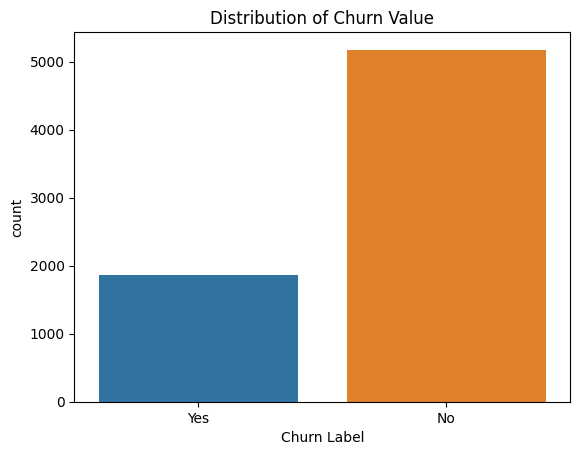

In [7]:
sns.countplot(x = "Churn Label", data = cust_records)
plt.title("Distribution of Churn Value")

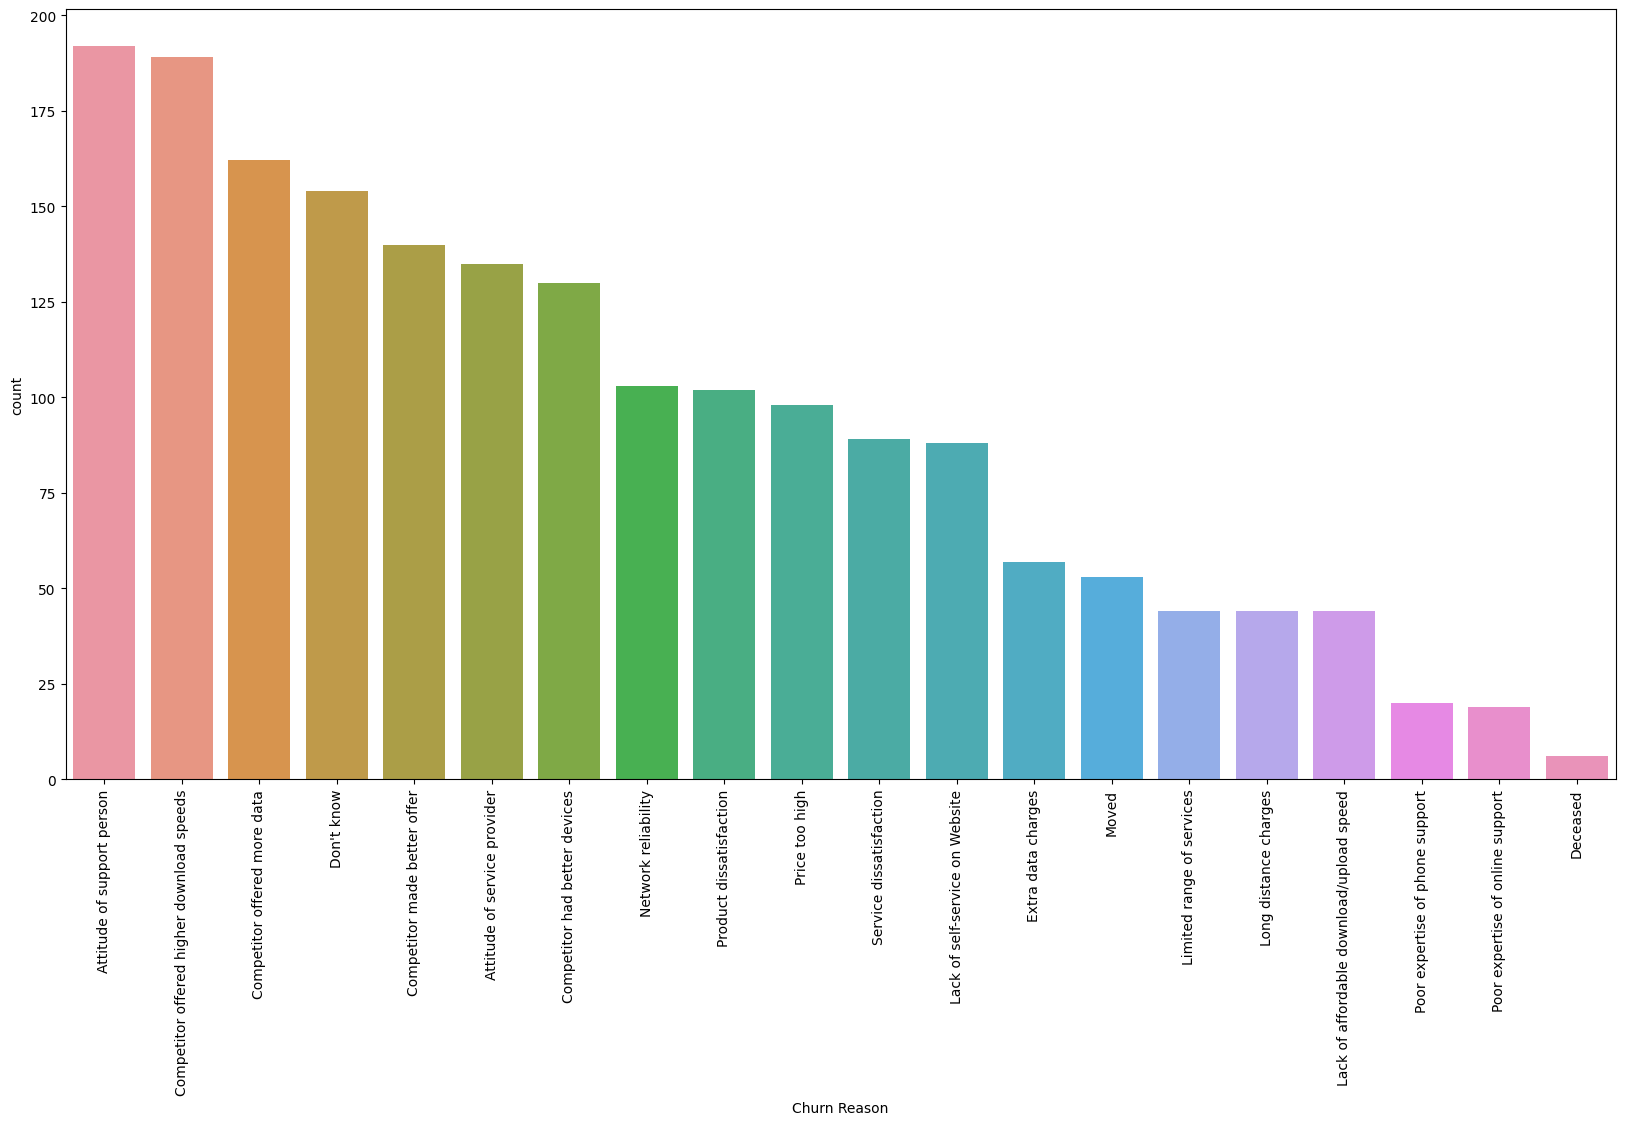

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='Churn Reason', data = cust_records,order = cust_records['Churn Reason'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [9]:
cust_records = cust_records[cust_records['Churn Reason']!= 'Deceased']
cust_records.shape

(7037, 33)

7 people have been deceased. We have to remove them.

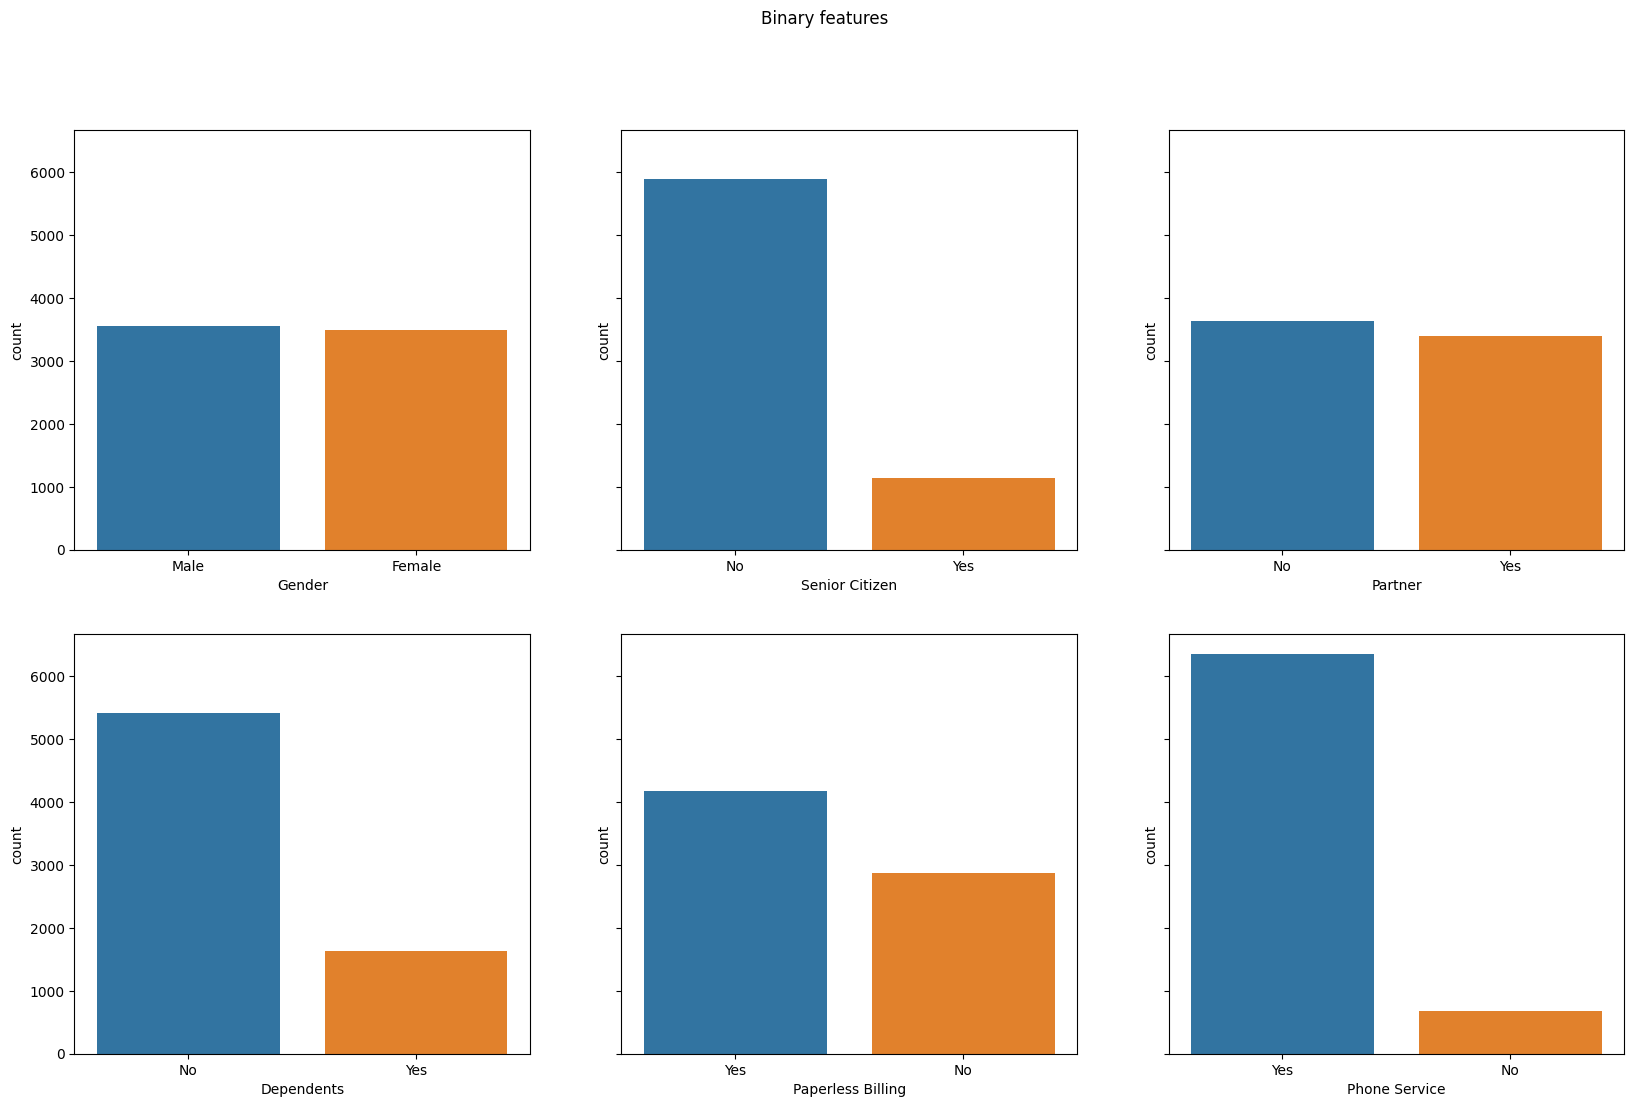

In [10]:
fig, axes = plt.subplots(2,3, figsize = (20,12), sharey = True)
plt.suptitle("Binary features")
sns.countplot(x = "Gender", data = cust_records, ax=axes[0,0])
sns.countplot(x = "Senior Citizen", data = cust_records, ax=axes[0,1])
sns.countplot(x = "Partner", data = cust_records, ax=axes[0,2])
sns.countplot(x = "Dependents", data = cust_records, ax=axes[1,0])
sns.countplot(x = "Paperless Billing", data = cust_records, ax=axes[1,1])
sns.countplot(x = "Phone Service", data = cust_records, ax=axes[1,2])
plt.show()


We can observe high imbalance in:

* Senior Citizen - Most of the customers are below the age of 65 years
* Dependents - Majority do not live with any dependent (kids, parents etc)
* Phone Service - Most use phone service

In [11]:
cust_records[['Gender', 'Churn Value']].groupby(['Gender']).mean()

,Churn Value
Gender,
Female,0.268370
Male,0.261188


In [12]:
cust_records[['Senior Citizen', 'Churn Value']].groupby(['Senior Citizen']).mean()

,Churn Value
Senior Citizen,
No,0.235543
Yes,0.415789


In [13]:
cust_records[['Partner','Dependents','Churn Value']].groupby(['Partner','Dependents']).mean()

Churn Value
Partner Dependents             
No      No             0.343628
        Yes            0.165563
Yes     No             0.294458
        Yes            0.042264

In [14]:
cust_records[['Phone Service', 'Churn Value']].groupby(['Phone Service']).mean()

,Churn Value
Phone Service,
No,0.248164
Yes,0.266520


### Categorical Features

<Axes: xlabel='Multiple Lines', ylabel='count'>

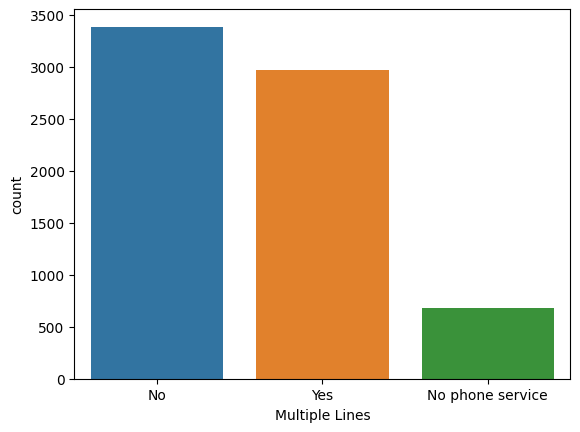

In [15]:
sns.countplot(x = 'Multiple Lines',data = cust_records)

In [16]:
cust_records[['Multiple Lines', 'Churn Value']].groupby(['Multiple Lines']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Multiple Lines,
Yes,0.285618
No,0.249779
No phone service,0.248164


<Axes: xlabel='Contract', ylabel='count'>

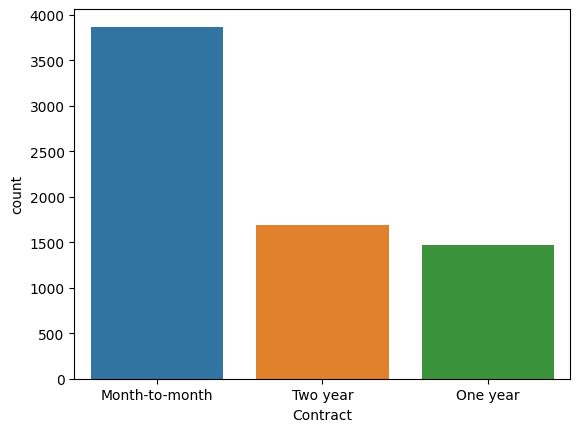

In [17]:
sns.countplot(x = 'Contract',data = cust_records)

In [18]:
cust_records[['Contract', 'Churn Value']].groupby(['Contract']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Contract,
Month-to-month,0.426208
One year,0.112695
Two year,0.028319


Customers with shorter contract tend to churn more

<Axes: xlabel='Internet Service', ylabel='count'>

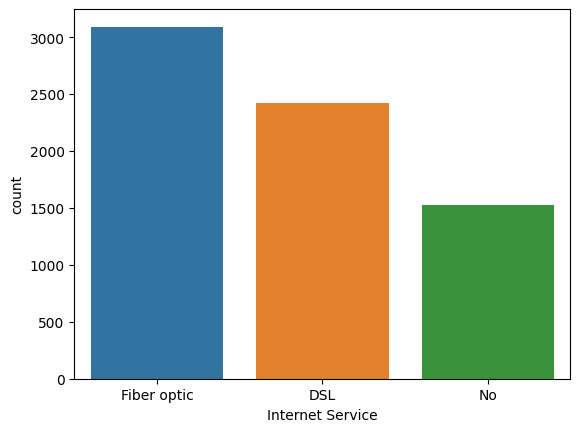

In [19]:
sns.countplot(x = 'Internet Service',data = cust_records,order= cust_records['Internet Service'].value_counts().index)

In [20]:
cust_records[['Internet Service', 'Churn Value']].groupby(['Internet Service']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Internet Service,
Fiber optic,0.418176
DSL,0.188921
No,0.074050


<Axes: xlabel='Payment Method', ylabel='count'>

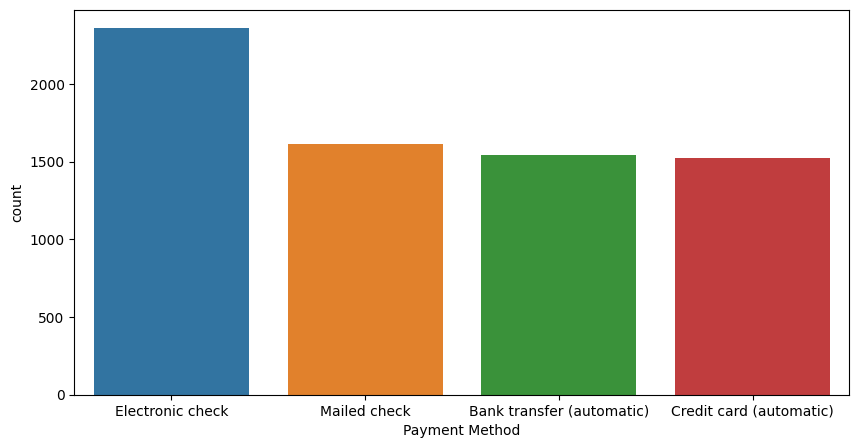

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Payment Method', data = cust_records, order = cust_records['Payment Method'].value_counts().index)

In [22]:
cust_records[['Payment Method', 'Churn Value']].groupby(['Payment Method']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Payment Method,
Electronic check,0.451462
Mailed check,0.191067
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431


Text(0.5, 1.0, 'Tenure vs Churn Value')

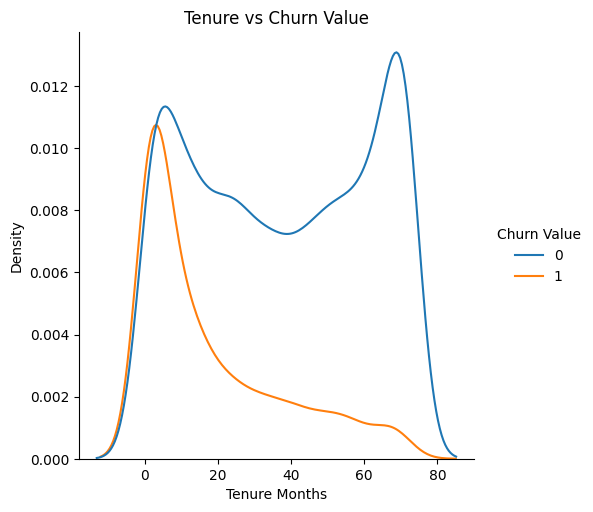

In [23]:
sns.displot(data = cust_records, x = "Tenure Months", hue = "Churn Value", kind = "kde")
plt.title('Tenure vs Churn Value')

Text(0.5, 1.0, 'Monthly Charges vs Churn Value')

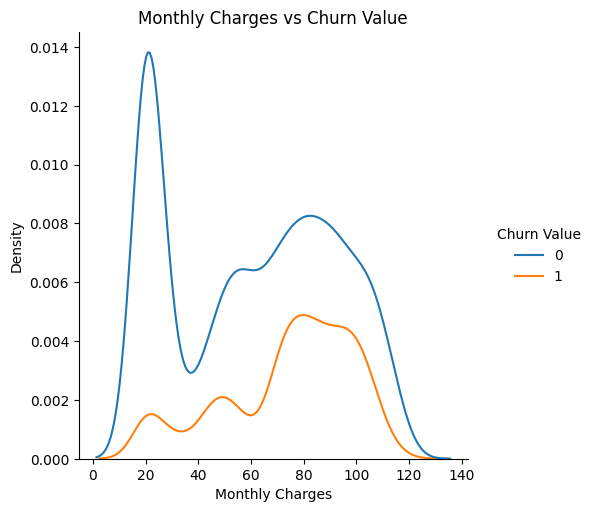

In [24]:
sns.displot(data = cust_records, x= 'Monthly Charges', hue = 'Churn Value', kind = "kde")
plt.title('Monthly Charges vs Churn Value')

In [25]:
cust_records[['Monthly Charges', 'Churn Value', 'Tenure Months']].groupby('Churn Value').mean()

,Monthly Charges,Tenure Months
Churn Value,,
0,61.265124,37.569965
1,74.460655,18.008588


Average monthly charges for churned customers is about 13 dollars higher and churned customers tend to leave the company about 20 months earlier than the not churned ones.


## Churn vs Poor Activation or Free tier

In [26]:
monthPA = cust_records[(cust_records['Tenure Months'] == 1) & (cust_records['Churn Value']==1)  & (cust_records.Contract=='Month-to-month')]
yearPA = cust_records[(cust_records['Tenure Months'] <= 12) & (cust_records['Churn Value']==1)  & (cust_records.Contract=='One year')]
poorActivation = pd.concat([monthPA,yearPA])

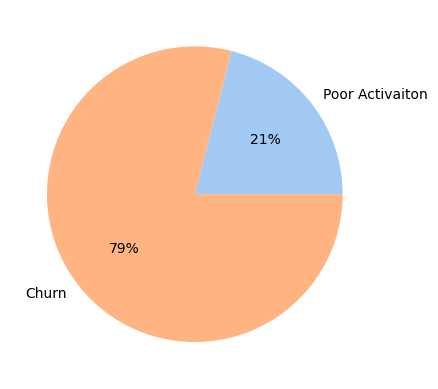

In [27]:
data_pie = [poorActivation.shape[0], cust_records[cust_records['Churn Value'] == 1].shape[0] -  poorActivation.shape[0]]
colors = sns.color_palette('pastel')[0:5]
plt.pie(data_pie, labels = ['Poor Activaiton','Churn'], colors = colors, autopct='%.0f%%')
plt.show()

## Data Pre-processing

In [28]:
cust_records_without_PA =  cust_records.copy()
cond = cust_records_without_PA.CustomerID.isin(poorActivation.CustomerID)
cust_records_without_PA.drop(cust_records_without_PA[cond].index, inplace = True)
cust_records_without_PA

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [29]:
filtered = cust_records_without_PA.iloc[:, 9:]
churnReason = filtered['Churn Reason']
filtered.drop(['Gender','Total Charges','Churn Label','Churn Reason'], inplace = True, axis=1)
filtered.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,Churn Score,CLTV
0,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,86,3239
1,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,67,2701
2,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,86,5372
3,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1,84,5003
4,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1,89,5340


## Scaling

In [30]:
scaler = MinMaxScaler()
filtered["Tenure Months"] = scaler.fit_transform(filtered[["Tenure Months"]])
filtered["Monthly Charges"] = scaler.fit_transform(filtered[["Monthly Charges"]])

In [31]:
categorical_features =  [i for i in filtered.columns if filtered[i].dtype == 'object']
categorical_features

['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [32]:
encode_df =  pd.get_dummies(filtered, columns = categorical_features, drop_first = True)
encode_df

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.027778,0.354229,1,86,3239,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.027778,0.521891,1,67,2701,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0.111111,0.809950,1,86,5372,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
3,0.388889,0.861194,1,84,5003,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
4,0.680556,0.850249,1,89,5340,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.000000,0.028856,0,45,5306,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
7039,0.333333,0.662189,0,59,2140,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7040,1.000000,0.845274,0,71,5560,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7041,0.152778,0.112935,0,59,2793,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Treating data imbalance with SMOTE

In [33]:
X = encode_df.drop('Churn Value', axis = 1)
Y = encode_df['Churn Value']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

In [34]:
Y_train.value_counts()

0    4115
1    1201
Name: Churn Value, dtype: int64

In [35]:
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [36]:
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)

In [37]:
X_train =  pd.DataFrame(X_train, columns =X.columns)

In [38]:
Y_train.value_counts()

1    4115
0    4115
Name: Churn Value, dtype: int64

In [39]:
Y_test.shape

(1330,)

## Model Training

In [40]:
#1 Logistic regression
log = LogisticRegression(max_iter = 1000)

#2 Random Tree Classifier
random = RandomForestClassifier()

#3 Decision Tree
dtree = DecisionTreeClassifier()

#4 XG Boost
xgb_model = XGBClassifier()

#4 KNN
knn = KNeighborsClassifier()

#5 Gradient Boosting
gb=GradientBoostingClassifier()

#6 Voting Hard
voting_hard = VotingClassifier(
    estimators=[('random_forest', RandomForestClassifier(random_state=42, n_jobs=-1)), ('xg_boost', XGBClassifier()),('gradient_boosting',  GradientBoostingClassifier())],
    voting='hard')

#7 Voting Soft
voting_soft = VotingClassifier(
    estimators=[('random_forest', RandomForestClassifier(random_state=42, n_jobs=-1)), ('xg_boost', XGBClassifier()),('gradient_boosting',  GradientBoostingClassifier())],
    voting='soft')

cv_dict = {0: 'Logistic Regression', 1:'Random Tree Classifier', 2: 'Decision Tree', 3: 'Xg Boost', 4: 'K Nearest Neighbors', 5: 'Gradient Boosting', 6:'Voting Classifier(Hard)', 7 : 'Voting Classifier(Soft)'}
cv_models=[log,random,dtree,xgb_model,knn,gb,voting_hard,voting_soft]

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score','ROC-AUC Score','Time taken (seconds)','Correct Lables Predicted (1330)'])

for i,model in enumerate(cv_models):

    print('------------------------------------------------------------------------\n')

    start_time = time.time()
    print("{} Train Accuracy: {} %\n".format(cv_dict[i],round(cross_val_score(model, X_train, Y_train, cv=5, scoring ='accuracy').mean()*100,2)))

    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)

    end_time = time.time()
    confusion =  metrics.confusion_matrix(Y_test, ypred)

    metrics_df.loc[len(metrics_df)] = [
        cv_dict[i],
        round(accuracy_score(Y_test, ypred),2),
        round(metrics.precision_score(Y_test, ypred),2),
        round(metrics.recall_score(Y_test, ypred),2),
        round(metrics.f1_score(Y_test, ypred),2),
        round(metrics.roc_auc_score(Y_test, ypred),2),
        end_time-start_time,
        confusion[0][0] + confusion[1][1]
    ]

------------------------------------------------------------------------



Logistic Regression Train Accuracy: 93.57 %

------------------------------------------------------------------------

Random Tree Classifier Train Accuracy: 95.02 %

------------------------------------------------------------------------

Decision Tree Train Accuracy: 93.28 %

------------------------------------------------------------------------

Xg Boost Train Accuracy: 94.88 %

------------------------------------------------------------------------

K Nearest Neighbors Train Accuracy: 88.46 %

------------------------------------------------------------------------

Gradient Boosting Train Accuracy: 94.99 %

------------------------------------------------------------------------

Voting Classifier(Hard) Train Accuracy: 95.24 %

------------------------------------------------------------------------

Voting Classifier(Soft) Train Accuracy: 95.13 %



In [41]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score,Time taken (seconds),Correct Lables Predicted (1330)
0,Logistic Regression,0.92,0.76,0.89,0.82,0.91,5.897351,1225
1,Random Tree Classifier,0.93,0.79,0.88,0.83,0.91,7.598728,1233
2,Decision Tree,0.90,0.73,0.83,0.77,0.87,0.299418,1199
3,Xg Boost,0.93,0.81,0.85,0.83,0.90,3.708994,1234
4,K Nearest Neighbors,0.83,0.56,0.83,0.67,0.83,1.050916,1109
5,Gradient Boosting,0.93,0.78,0.90,0.83,0.92,13.246935,1233
6,Voting Classifier(Hard),0.93,0.78,0.88,0.83,0.91,22.910866,1231
7,Voting Classifier(Soft),0.92,0.79,0.87,0.82,0.90,20.011769,1230


### GridSearch for Logistic Regression

In [42]:
params_log = {
    'C': [100, 10, 1, 0.1, 0.01],
    'penalty': ['l2'],
    'max_iter':[700,1000,1500]
}
gscv_log = GridSearchCV(estimator = log, param_grid = params_log, cv = 5, n_jobs = -1)

In [43]:
gscv_log.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'max_iter': [700, 1000, 1500], 'penalty': ['l2']})

In [44]:
gscv_log.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}

In [45]:
gscv_log.best_score_

0.9393681652490887

### GridSearch for XGBoost

In [46]:
parameters = {'n_estimators':[150,200,250],
              'max_depth':[20,25,30],
              'learning_rate': [0.2,0.3,0.4]}
gscv_xgb = GridSearchCV(estimator = xgb_model, param_grid = parameters, cv = 5, n_jobs = -1)

In [47]:
gscv_xgb.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [20, 25, 30],
                         'n_estimators': [150, 200, 250]})

In [48]:
gscv_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 250}

In [49]:
gscv_xgb.best_score_

0.9500607533414337

### GridSearch for Random Forest

In [50]:
params_random = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
gscv_random = GridSearchCV(estimator = random, param_grid = params_random, cv = 5, n_jobs = -1)

In [51]:
gscv_random.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [52]:
gscv_random.best_params_

{'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [53]:
gscv_random.best_score_

0.948359659781288

### GridSearch for Gradiest Boosting

In [54]:
params_gradientBoosting = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5,0.2],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5]
}

In [55]:
gscv_gb = GridSearchCV(estimator = gb, param_grid = params_gradientBoosting, cv = 5, n_jobs = -1)

In [56]:
gscv_gb.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.2],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]})

In [57]:
gscv_gb.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [58]:
gscv_gb.best_score_

0.9500607533414339

### Combining all the models

In [42]:
#1 Best Xgb Model
best_xgb_model = XGBClassifier(learning_rate= 0.2, max_depth= 30, n_estimators= 250)

#2 Best gb Model
best_gb_model = GradientBoostingClassifier(learning_rate = 0.1, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100)

#3 Best Random Model

best_random_model = RandomForestClassifier(max_depth = 7, max_features = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 200)

#2 Voting Hard
best_voting_hard = VotingClassifier(
    estimators=[('random_forest', RandomForestClassifier(max_depth = 7, max_features = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 200)), ('xg_boost', XGBClassifier(learning_rate= 0.2, max_depth= 30, n_estimators= 250)),('gradient_boosting', GradientBoostingClassifier(learning_rate = 0.1, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100))],
    voting='hard')

#3 Voting Soft
best_voting_soft = VotingClassifier(
    estimators=[('random_forest', RandomForestClassifier(max_depth = 7, max_features = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 200)), ('xg_boost', XGBClassifier(learning_rate= 0.2, max_depth= 30, n_estimators= 250)),('gradient_boosting', GradientBoostingClassifier(learning_rate = 0.1, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100))],
    voting='soft')

cv_dict = {0: 'Xg Boost(Best)', 1:'Random Forest(Best)', 2:'Gradient Boosting(Best)', 3:'Voting Classifier(Hard) Best', 4 : 'Voting Classifier(Soft) Best'}
cv_models=[best_xgb_model,best_random_model,best_gb_model,best_voting_hard,best_voting_soft]

for i,model in enumerate(cv_models):

    print('------------------------------------------------------------------------\n')

    start_time = time.time()
    print("{} Train Accuracy: {} %\n".format(cv_dict[i],round(cross_val_score(model, X_train, Y_train, cv=5, scoring ='accuracy').mean()*100,2)))

    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)

    end_time = time.time()
    confusion =  metrics.confusion_matrix(Y_test, ypred)

    metrics_df.loc[len(metrics_df)] = [
        cv_dict[i],
        round(accuracy_score(Y_test, ypred),2),
        round(metrics.precision_score(Y_test, ypred),2),
        round(metrics.recall_score(Y_test, ypred),2),
        round(metrics.f1_score(Y_test, ypred),2),
        round(metrics.roc_auc_score(Y_test, ypred),2),
        end_time-start_time,
        confusion[0][0] + confusion[1][1]
    ]


------------------------------------------------------------------------

Xg Boost(Best) Train Accuracy: 95.01 %

------------------------------------------------------------------------

Random Forest(Best) Train Accuracy: 94.79 %

------------------------------------------------------------------------

Gradient Boosting(Best) Train Accuracy: 95.01 %

------------------------------------------------------------------------

Voting Classifier(Hard) Best Train Accuracy: 95.03 %

------------------------------------------------------------------------

Voting Classifier(Soft) Best Train Accuracy: 95.03 %



In [43]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score,Time taken (seconds),Correct Lables Predicted (1330)
0,Logistic Regression,0.92,0.76,0.89,0.82,0.91,5.897351,1225
1,Random Tree Classifier,0.93,0.79,0.88,0.83,0.91,7.598728,1233
2,Decision Tree,0.90,0.73,0.83,0.77,0.87,0.299418,1199
3,Xg Boost,0.93,0.81,0.85,0.83,0.90,3.708994,1234
4,K Nearest Neighbors,0.83,0.56,0.83,0.67,0.83,1.050916,1109
5,Gradient Boosting,0.93,0.78,0.90,0.83,0.92,13.246935,1233
6,Voting Classifier(Hard),0.93,0.78,0.88,0.83,0.91,22.910866,1231
7,Voting Classifier(Soft),0.92,0.79,0.87,0.82,0.90,20.011769,1230
8,Xg Boost(Best),0.93,0.80,0.86,0.83,0.90,13.535711,1236
9,Random Forest(Best),0.92,0.76,0.92,0.83,0.92,24.518134,1230


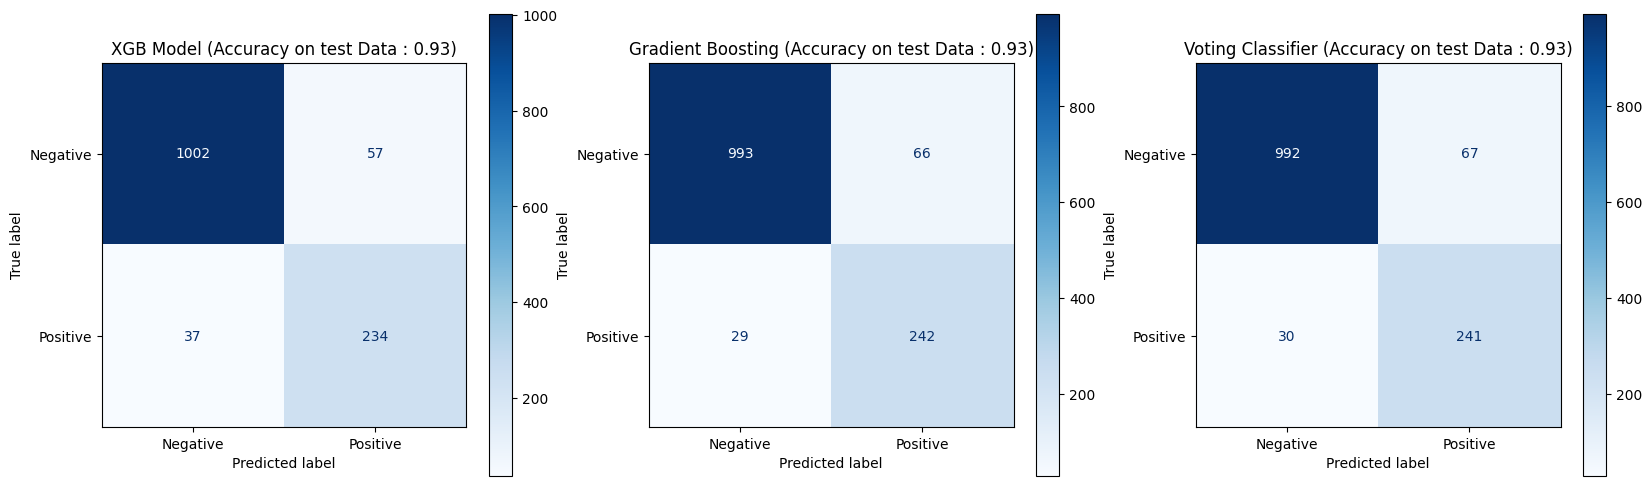

In [44]:
fig, ax = plt.subplots(1,3, figsize = (20,6))
ax[0].set_title("XGB Model (Accuracy on test Data : 0.93)")
ax[1].set_title("Gradient Boosting (Accuracy on test Data : 0.93)")
ax[2].set_title("Voting Classifier (Accuracy on test Data : 0.93)")


confusion_matrix = metrics.confusion_matrix(Y_test, best_xgb_model.predict(X_test) )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot(ax = ax[0], cmap='Blues')

confusion_matrix = metrics.confusion_matrix(Y_test, best_gb_model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot(ax = ax[1], cmap='Blues')

confusion_matrix = metrics.confusion_matrix(Y_test, best_voting_hard.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot(ax = ax[2], cmap='Blues')

plt.show()

## Analyze of churn reason

1863


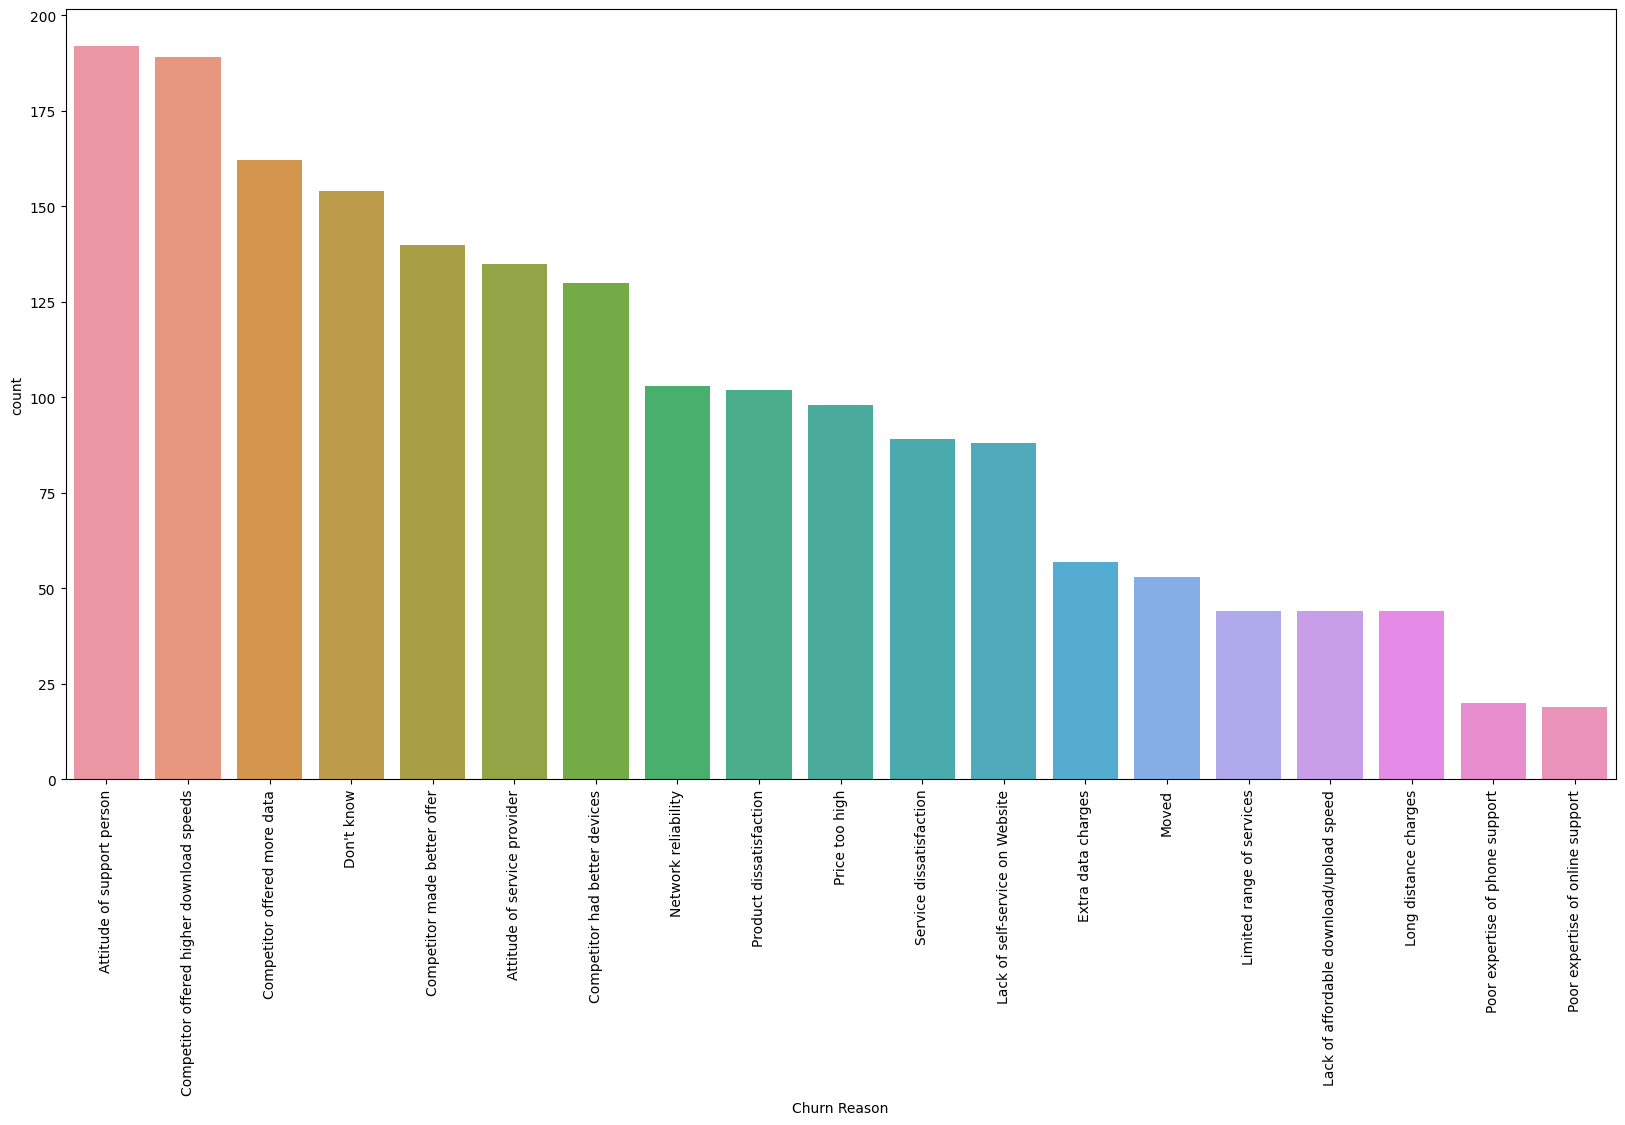

In [45]:
print(cust_records['Churn Value'].sum())
plt.figure(figsize=(20,10))
sns.countplot(x='Churn Reason', data = cust_records,order = cust_records['Churn Reason'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

391


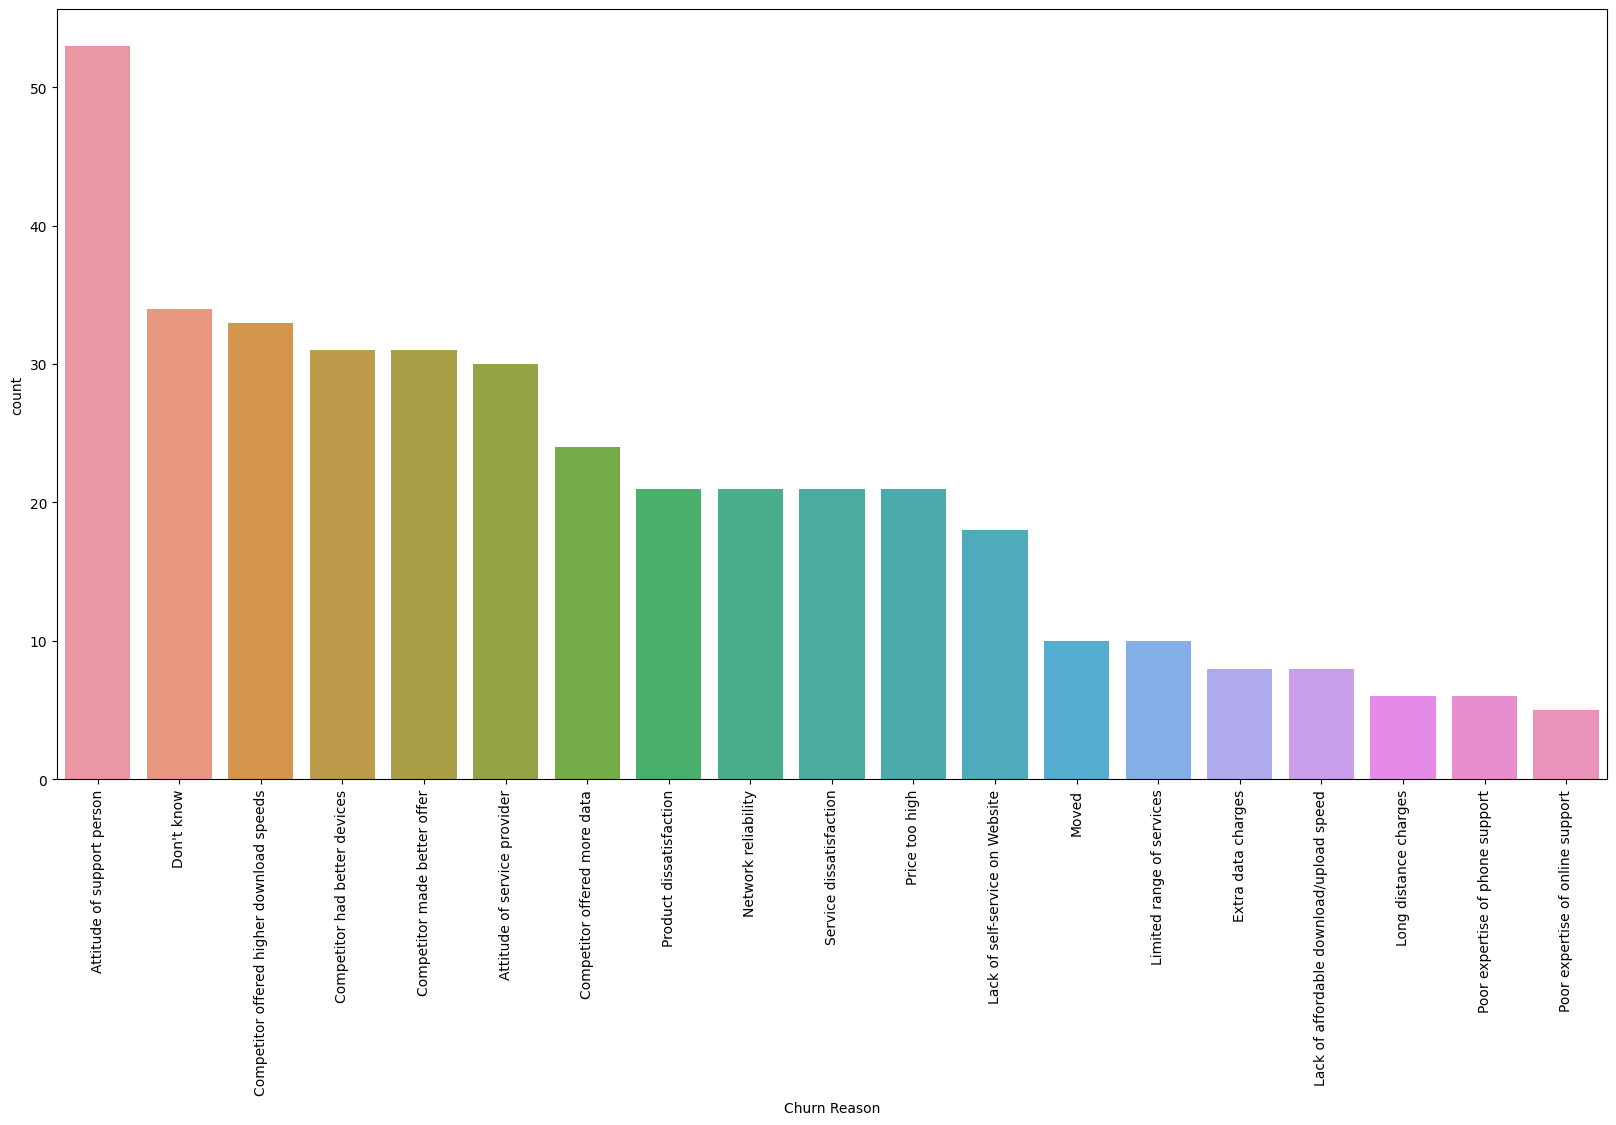

In [46]:
print(poorActivation['Churn Value'].sum())
plt.figure(figsize=(20,10))
sns.countplot(x= 'Churn Reason', data = poorActivation, order = poorActivation['Churn Reason'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [47]:
## Overall
text = " ".join(cat for cat in cust_records['Churn Reason'][cust_records['Churn Value']==1])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

## 1st subscription
text_PA = " ".join(cat for cat in poorActivation['Churn Reason'])
word_cloud_pa = WordCloud(collocations = False, background_color = 'white').generate(text_PA)


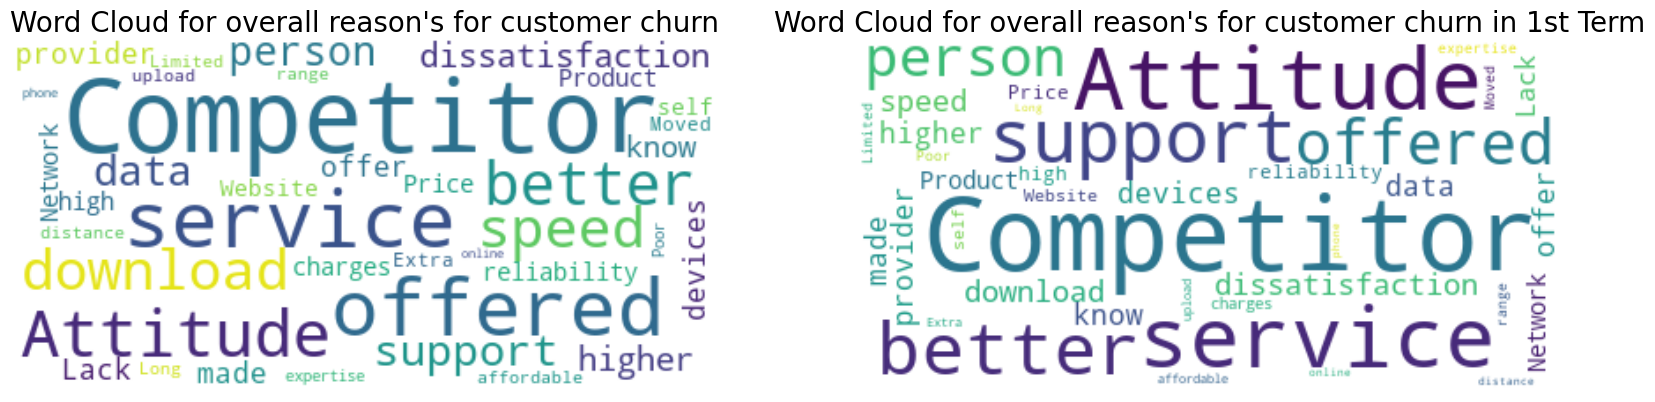

In [48]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
ax[0].set_title("Word Cloud for overall reason's for customer churn",fontsize = 20)
ax[1].set_title("Word Cloud for overall reason's for customer churn in 1st Term",fontsize = 20)


ax[0].imshow(word_cloud, interpolation='bilinear',)
ax[0].axis("off")


ax[1].imshow(word_cloud_pa, interpolation='bilinear',)
ax[1].axis("off")

plt.show()


In [49]:
overall = pd.DataFrame()
overall['Main Reason'] = cust_records['Churn Reason'].apply(lambda x: 'Competitor' if 'Competitor' in str(x) else 'Support or Service issues' if ('support' in str(x) or 'service' in str(x)) else 'Dissatisfaction' if 'dissatisfaction' in str(x) else x)
overall['First Term'] = poorActivation['Churn Reason'].apply(lambda x: 'Competitor' if 'Competitor' in str(x) else 'Support or Service issues' if ('support' in str(x) or 'service' in str(x)) else 'Dissatisfaction' if 'dissatisfaction' in str(x) else x)
overall.shape

(7037, 2)

In [50]:
overall.fillna('N/A',inplace=True)

In [51]:
overall.loc[overall['First Term'] != 'N/A', 'Main Reason'] = np.nan
overall.replace('N/A',np.nan,inplace=True)

In [52]:
df_top5_ovr = overall['Main Reason'].value_counts()[:5]
df_top5_ovr.loc['Others'] = sum(overall['Main Reason'].value_counts()[5:])

df_top5_pa = overall['First Term'].value_counts()[:5]
df_top5_pa.loc['Others'] = sum(overall['First Term'].value_counts()[5:])


In [53]:
total_ovr = overall['Main Reason'].value_counts().values.sum()
def fmt_ovr(x):
    return '{:.1f}%\n({:.0f})'.format(x, total_ovr*x/100)

total_pa = overall['First Term'].value_counts().values.sum()
def fmt_pa(x):
    return '{:.1f}%\n({:.0f})'.format(x, total_pa*x/100)


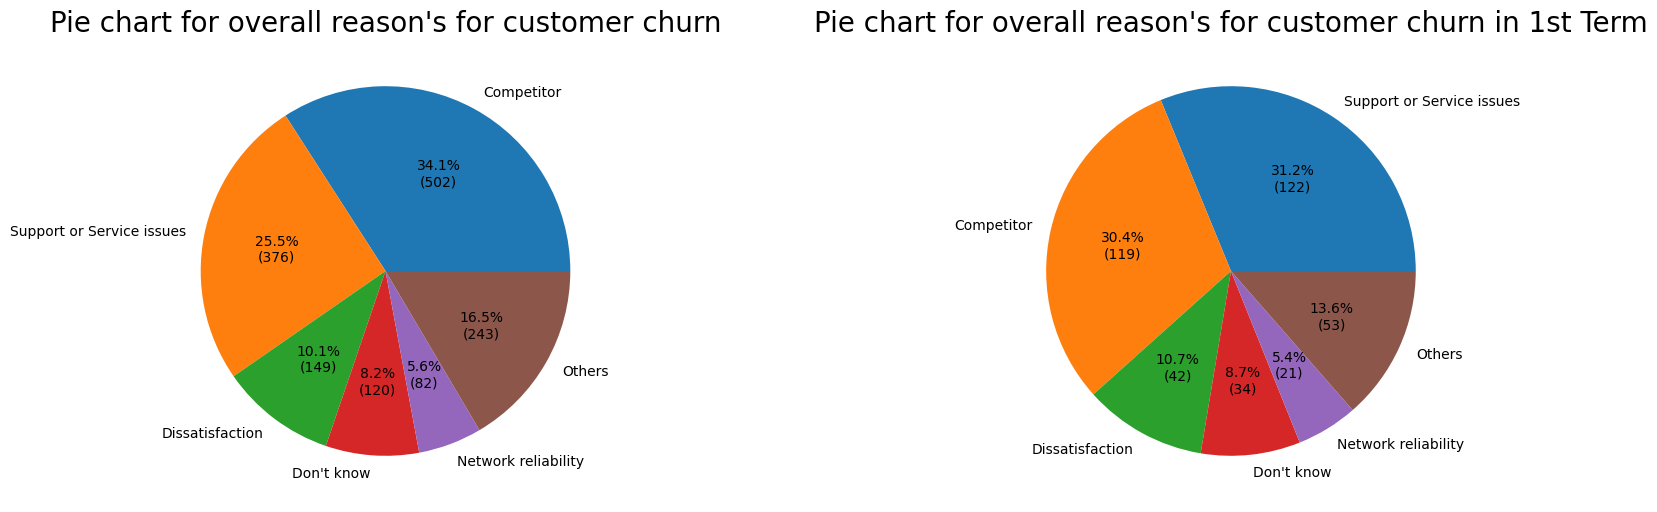

In [54]:
fig, ax = plt.subplots(1,2, figsize = (20,6),facecolor = 'White')

ax[0].pie(df_top5_ovr, labels = df_top5_ovr.index ,autopct=fmt_ovr)
ax[1].pie(df_top5_pa, labels = df_top5_pa.index ,autopct=fmt_pa)

ax[0].set_title("Pie chart for overall reason's for customer churn",fontsize = 20)
ax[1].set_title("Pie chart for overall reason's for customer churn in 1st Term",fontsize = 20)

plt.show()


Based on the pie chart and word cloud analyses, it is evident that the top three reasons for customer churn are competition, support or service issues, and dissatisfaction. Moreover, the analysis shows that a higher percentage of customers cancel their contract after their first term (31.2%) than those who cancel it due to support or service issues (25.5%) after first term.

Furthermore, the analysis reveals that customers who churn after the first period are more likely to be dissatisfied with the support or service they received.